In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# THEORIE TEST 
-----------------------------

AVEC 
- BETA_PARTICLES_532  
- BETA_MOLECULAR_532

- BETA_PARTICLES_355
- BETA_MOLECULAR_355

In [3]:
betamol532 = 1e-3
beta_part = np.arange(0, 1e-1, 1e-4)
ratio_sr532_sr355 = 5.3 * (betamol532 + beta_part) / (betamol532*5.3 + beta_part)

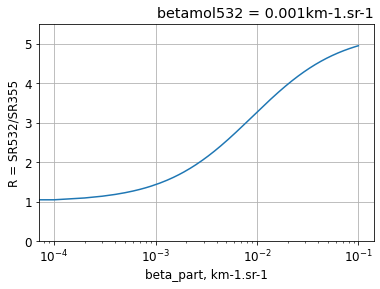

In [13]:
plt.rcParams['font.size']=12
plt.rcParams['xtick.labelsize'] = 'medium'
plt.semilogx(beta_part, ratio_sr532_sr355)
# plt.plot(beta_part, ratio_sr532_sr355)
plt.xlabel('beta_part, km-1.sr-1')
plt.ylabel('R = SR532/SR355')
plt.title(f'betamol532 = {betamol532}km-1.sr-1', loc='right')
plt.ylim(0, 5.5)
plt.grid()

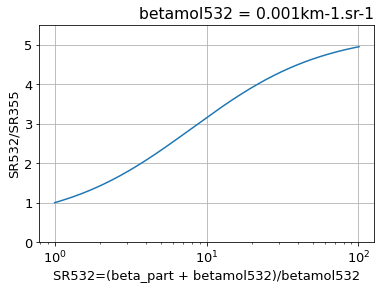

In [8]:
plt.rcParams['font.size']=13
plt.rcParams['xtick.labelsize'] = 'small'
plt.semilogx((beta_part + betamol532)/betamol532, ratio_sr532_sr355)
plt.xlabel('SR532=(beta_part + betamol532)/betamol532')
plt.ylabel('SR532/SR355')
plt.title(f'betamol532 = {betamol532}km-1.sr-1', loc='right')
plt.ylim(0, 5.5)
plt.grid()

In [6]:
betamol355 = 1e-3
beta_part = np.arange(0, 1e-1, 1e-4)
ratio_sr532_sr355 = 5.3 * (betamol355/5.3 + beta_part) / (betamol355 + beta_part)


<Figure size 432x288 with 0 Axes>

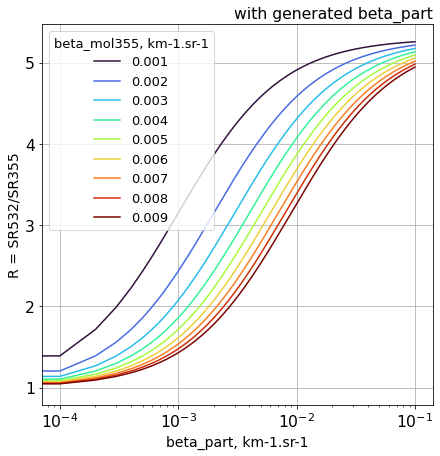

In [35]:
betamol355s = np.arange(1e-3, 1e-2, 1e-3)
plt.clf()
fig, ax = plt.subplots(figsize=(7,7))

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

for betamol355 in betamol355s:
    beta_part = np.arange(0, 1e-1, 1e-4)
    ratio_sr532_sr355 = 5.3 * (betamol355/5.3 + beta_part) / (betamol355 + beta_part)
    ax.semilogx(beta_part, ratio_sr532_sr355, label=f'{np.round(betamol355,3)}')
    

colormap = plt.cm.turbo #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(title = 'beta_mol355, km-1.sr-1')
plt.xlabel('beta_part, km-1.sr-1')
plt.ylabel('R = SR532/SR355')
plt.title(f'with generated beta_part', loc='right')
# plt.ylim(0, 5.5)
plt.grid()
# plt.savefig('/homedata/nmpnguyen/theory-ratio-SR532SR355(1).png')



<Figure size 432x288 with 0 Axes>

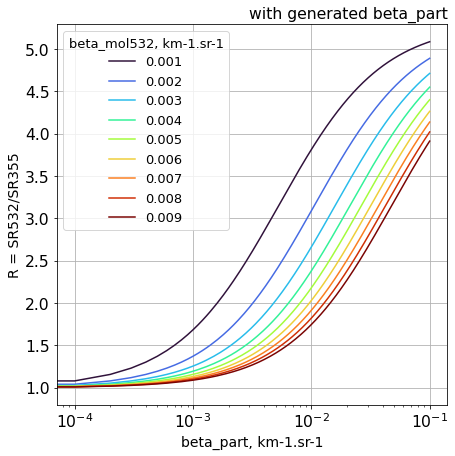

In [38]:
betamol532s = np.arange(1e-3, 1e-2, 1e-3)
plt.clf()
fig, ax = plt.subplots(figsize=(7,7))
# plt.rcParams['font.size']=13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
for betamol532 in betamol532s:
    beta_part = np.arange(0, 1e-1, 1e-4)
    ratio_sr532_sr355 = 5.3 * (betamol532 + beta_part) / (betamol532*5.3 + beta_part)
    ax.semilogx(beta_part, ratio_sr532_sr355, label=f'{np.round(betamol532,3)}')
    

colormap = plt.cm.turbo #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(title = 'beta_mol532, km-1.sr-1')
plt.xlabel('beta_part, km-1.sr-1')
plt.ylabel('R = SR532/SR355')
plt.title(f'with generated beta_part', loc='right')
# plt.ylim(0, 5.5)
plt.grid()
# plt.savefig('/homedata/nmpnguyen/theory-ratio-SR532SR355(1).png')



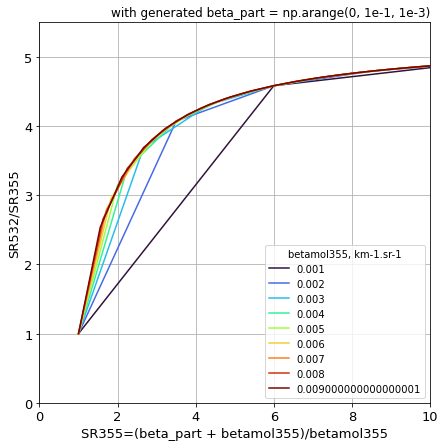

In [341]:
betamol355s = np.arange(1e-3, 1e-2, 1e-3)
fig, ax = plt.subplots(figsize=(7,7))
for betamol355 in betamol355s:
    beta_part = np.arange(0, 1e-1, 5e-3)
    ratio_sr532_sr355 = 5.3 * (betamol355/5.3 + beta_part) / (betamol355 + beta_part)
#     print((beta_part + betamol355)/betamol355)
    ax.plot((beta_part + betamol355)/betamol355, ratio_sr532_sr355, label=f'{betamol355}')
    
    
colormap = plt.cm.turbo #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])    
    
ax.legend(title = 'betamol355, km-1.sr-1')   
plt.xlabel('SR355=(beta_part + betamol355)/betamol355', fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('SR532/SR355', fontsize=13)
plt.yticks(fontsize=13)
plt.title('with generated beta_part = np.arange(0, 1e-1, 1e-3)', loc='right')
plt.ylim(0, 5.5)
plt.xlim(0,10)
plt.grid()
plt.savefig('/homedata/nmpnguyen/theory-ratio-SR532SR355(2).png')

## THEORIE APPROUVE AVEC IPRAL
------------------------

- CHECH RATIO SR532/SR355 
- SCATTERPLOT AVEC SR355 VS RATIO VS RANGE ALTITUDE

In [335]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [55]:
def ratio(sr355, beta_mol355):
    '''
    la fonction de SR532/SR355 en fonction de SR355 et betamol355
    '''
    beta_part355 = sr355*beta_mol355 - beta_mol355
    ratio_SR532_SR355 = 5.3 * (beta_mol355/5.3 + beta_part355) / (beta_mol355 + beta_part355)
    return ratio_SR532_SR355

In [53]:
#Exemple d'un profil Ipral 
date = Path('/homedata/nmpnguyen/IPRAL/NETCDF/v_simple/2018/ipral_1a_Lz1R15mF30sPbck_v01_20180910_000000_1440.nc')
d = xr.open_dataset(date)
date = date.stem.split('_')[4]
alt_selected = 2000
ipral_betamol355 = d['simulated'].where((d['flags']==0) & (d['range']<alt_selected), drop=True).sel(wavelength=355)#.values

ipral_sr355 = (d['calibrated']/d['simulated']).where((d['flags']==0) & (d['range']>alt_selected) & (d['range']<15000), drop=True).sel(wavelength=355)#.values
ipral_sr532 = (d['calibrated']/d['simulated']).where((d['flags']==0) & (d['range']>alt_selected) & (d['range']<15000), drop=True).sel(wavelength=532)#.values

# print(ipral_betamol355.shape, ipral_sr355.shape)

In [51]:
ipral_sr532.shape

(1252, 3867)

(0.0, 15000.0)

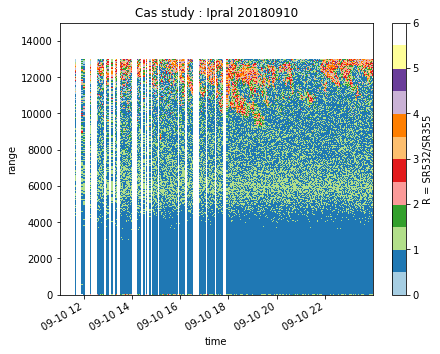

In [27]:
import matplotlib as mpl
# cmap = mpl.cm.turbo
bounds = np.linspace(0, 6, 13)#np.arange(0,8,0.2)
norm = mpl.colors.BoundaryNorm(bounds, 13 )

ipral_ratio = (ipral_sr532/ipral_sr355)
# ipral_ratio.where(ipral_ratio > 0, drop=False).plot(x='time', y='range', norm=LogNorm(vmin=1e-2), cmap='turbo') 
ipral_ratio.plot(x='time', y='range', figsize=(7,5),
                 cmap=plt.get_cmap("Paired", 12), norm=norm, 
                 extend='neither', 
                 cbar_kwargs=({'label':'R = SR532/SR355', 
                               'spacing':'uniform'})) #, norm=LogNorm(vmin=1e-1, vmax=1e2)
plt.title(f'Cas study : Ipral {date}')
plt.ylim(0,15000)

(0.0, 15000.0)

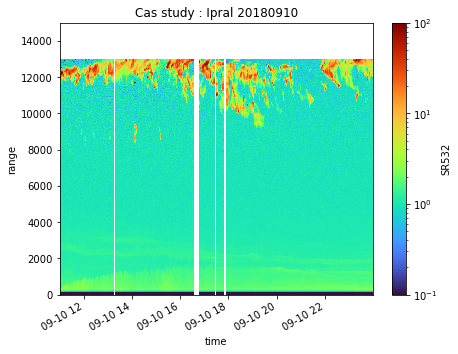

In [28]:
ipral_sr532.plot(x='time', y='range', figsize=(7,5),extend='neither', 
                 cbar_kwargs=({'label':'SR532'}), cmap='turbo', norm=LogNorm(vmin=1e-1, vmax=1e2))
plt.title(f'Cas study : Ipral {date}')
plt.ylim(0,15000)

(0.0, 15000.0)

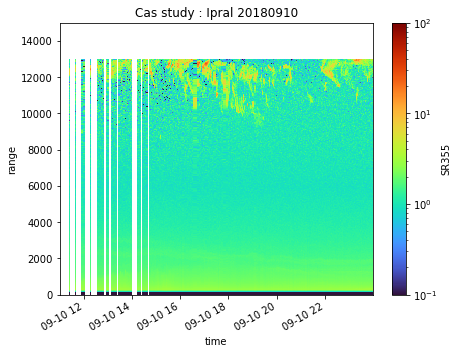

In [29]:
ipral_sr355.plot(x='time', y='range', figsize=(7,5),extend='neither', 
                 cbar_kwargs=({'label':'SR355'}), cmap='turbo', norm=LogNorm(vmin=1e-1, vmax=1e2))
plt.title(f'Cas study : Ipral {date}')
plt.ylim(0,15000)

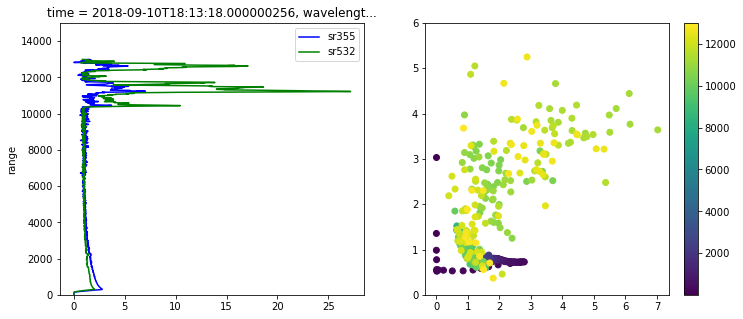

In [39]:
fig, ax = plt.subplots(ncols = 2, figsize=(12,5))
ipral_sr355.isel(time=580).plot(ax=ax[0], y='range', xscale='linear', label = 'sr355', color= 'b')
ipral_sr532.isel(time=580).plot(ax=ax[0], y='range', xscale='linear', label = 'sr532', color= 'g')
# (ipral_sr532/ipral_sr355).isel(time=580).plot(y='range', xscale='linear', label = 'R', color= 'r')
ax[0].legend()
ax[0].set_ylim(0,15000)
# plt.xlim(-0.5, 100)

sc = ax[1].scatter(ipral_sr355.isel(time=580), (ipral_sr532/ipral_sr355).isel(time=580), c=ipral_sr355.range.values) 
ax[1].set_ylim(0,6)
plt.colorbar(sc)

In [371]:
bounds.shape, np.linspace(0, 8, 17)

((40,),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. ]))

In [238]:
if (ipral_sr355.time == ipral_sr532.time).all():
    ipral_betamol355 = ipral_betamol355.sel(time = ipral_sr355.time)

if (ipral_sr355.range == ipral_sr532.range).all():
    if (ipral_betamol355.range == ipral_sr355.range).all():
        print('before remove NaN values, all variables have the same time and range')
    else: 
        ipral_betamol355 = ipral_betamol355.sel(range = ipral_sr355.range)

before remove NaN values, all variables have the same time and range


In [239]:
ipral_sr355.shape, ipral_sr532.shape, ipral_betamol355.shape

((2004, 1333), (2004, 1333), (2004, 1333))

In [240]:
ratio_by_fct = ratio(ipral_sr355.values, ipral_betamol355.values)
print(ratio_by_fct)


[[-6.68170257e+06 -1.47291125e+06 -2.02919762e+04 ...  5.71351530e+00
   6.32618414e+00 -1.35281167e+02]
 [-7.77399994e+06 -1.75843424e+06 -2.07722288e+04 ...  4.62840609e+00
   4.79578893e+00  3.29578935e+00]
 [-6.68355321e+06 -1.71204625e+06 -2.06887008e+04 ...  1.43005017e+01
   8.11292691e+00  4.46250244e+00]
 ...
 [-6.14095087e+06 -2.02378830e+06 -1.82033215e+04 ...  1.96308088e+00
   6.41930952e+00  6.39254098e+00]
 [            nan             nan             nan ...             nan
              nan             nan]
 [-6.17860638e+06 -2.37787543e+06 -1.82162535e+04 ...  7.78368901e+00
   7.47849748e+00 -8.22837322e+00]]


<ipython-input-55-801d7ebb7599>:6: RuntimeWarning: divide by zero encountered in true_divide
  ratio_SR532_SR355 = 5.3 * (beta_mol355/5.3 + beta_part355) / (beta_mol355 + beta_part355)


(0.0, 6.0)

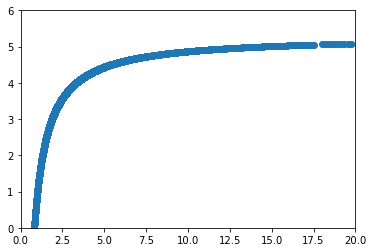

In [242]:
plt.scatter(ipral_sr355.values.ravel(), ratio_by_fct.ravel())
# plt.legend()
plt.xlim(0, 20)
plt.ylim(0, 6)
# print(ratio_by_fct[:, -1]* ipral_sr355[:,-1])

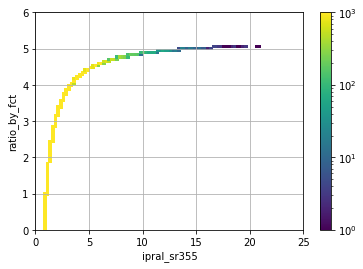

In [245]:
plt.hist2d(ipral_sr355.values.ravel(), ratio_by_fct.ravel(), bins=100, range=[[0,25], [0,6]], norm=LogNorm(vmax=1e3))
plt.colorbar()
plt.xlabel('ipral_sr355')
plt.ylabel('ratio_by_fct')
plt.grid()

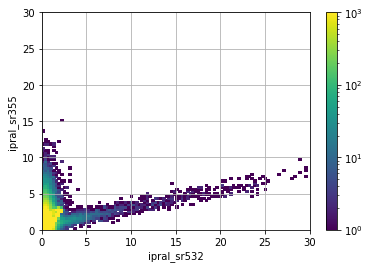

In [246]:
plt.hist2d(ipral_sr532.values.ravel(), ipral_sr355.values.ravel(), bins=100, range=[[0,30], [0,30]], norm=LogNorm(vmax=1e3))
plt.colorbar()
plt.xlabel('ipral_sr532')
plt.ylabel('ipral_sr355')
plt.grid()

/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in multiply
  result_data = func(*input_data)


Text(0, 0.5, 'ratio SR532/SR355 * ipral_sr355')

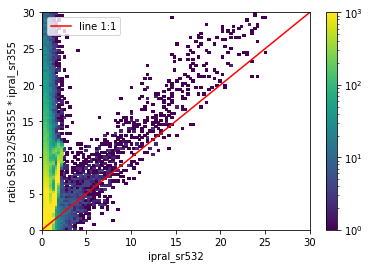

In [247]:
plt.hist2d(ipral_sr532.values.ravel(), (ratio_by_fct*ipral_sr355).values.ravel(), bins=100, range=[[0,30], [0,30]], norm=LogNorm(vmax=1e3))
plt.colorbar()
plt.plot(np.arange(0,80,1), np.arange(0,80,1), label='line 1:1', color='r')
plt.legend()
plt.xlabel('ipral_sr532')
plt.ylabel('ratio SR532/SR355 * ipral_sr355')


Text(0, 0.5, '5.3 * ipral_sr355')

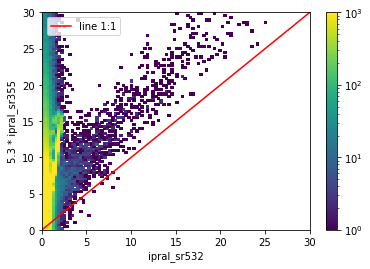

In [248]:
plt.hist2d(ipral_sr532.values.ravel(), (5.3*ipral_sr355).values.ravel(), bins=100, range=[[0,30], [0,30]], norm=LogNorm(vmax=1e3))
plt.colorbar()
plt.plot(np.arange(0,80,1), np.arange(0,80,1), label='line 1:1', color='r')
plt.legend()
plt.xlabel('ipral_sr532')
plt.ylabel('5.3 * ipral_sr355')

[Text(0.5, 0, 'SR355'),
 Text(0, 0.5, 'R = SR532 / SR355'),
 Text(0.5, 1.0, 'Cas study: Ipral 20180910')]

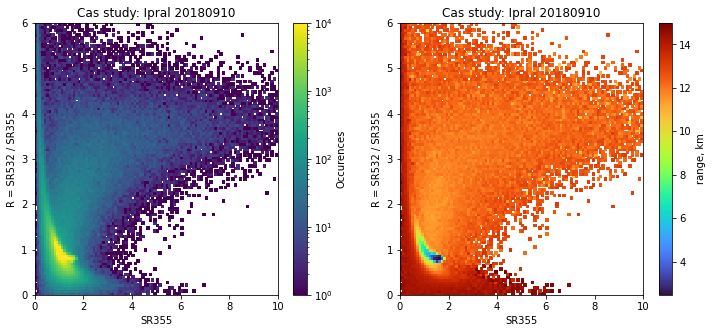

In [98]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
_, _, _, ima = ax[0].hist2d(ipral_sr355.values.ravel(), (ipral_sr532/ipral_sr355).values.ravel(),
          bins=100, range=[[0,10], [0,6]], norm=LogNorm(vmax=1e4))
plt.colorbar(ima, ax = ax[0], label='Occurences')
ax[0].set(xlabel = 'SR355', 
         ylabel = 'R = SR532 / SR355',
         title = f'Cas study: Ipral {date}')
# ax[0].set_xscale('log')
# ax[0].set_xlim(1e-1, 1e2)

sums, xbins, ybins = np.histogram2d(ipral_sr355.values.ravel(), (ipral_sr532/ipral_sr355).values.ravel(), 
                                    weights=np.tile(ipral_sr355.range.values, ipral_sr355.time.shape[0]).ravel()/1e3,
                                   bins = 100, range=[[0,10], [0,6]])
counts, _, _ = np.histogram2d(ipral_sr355.values.ravel(), (ipral_sr532/ipral_sr355).values.ravel(),
                              bins = 100, range=[[0,10], [0,6]])
cmap = mpl.cm.turbo
bounds = np.arange(2,14,0.5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='max')
with np.errstate(divide='ignore', invalid='ignore'):
    ima = ax[1].pcolormesh(xbins, ybins, (sums/counts).T, cmap=cmap)
# ima = ax[1].hist2d(ipral_sr355.values.ravel(), (ipral_sr532/ipral_sr355).values.ravel(), 
#                             weights=np.tile(ipral_sr355.range.values, ipral_sr355.time.shape[0]).ravel()/1e3, #ipral_betamol355.values.ravel()*1e3,
#           bins=100, range=[[0,10], [0,6]], cmap='turbo')
cbar = plt.colorbar(ima, ax=ax[1], label='range, km') #'Beta_mol 355, km-1.sr-1'

ax[1].set(xlabel = 'SR355', 
         ylabel = 'R = SR532 / SR355',
         title = f'Cas study: Ipral {date}')
# ax[1].set_xscale('log')
# ax[1].set_xlim(1e-1, 1e2)

In [78]:
ima[0].max()

245952.76501893997

In [71]:
ima[0].shape

(100, 100)

In [108]:
configs = {
    'start_range' : 0,
    'end_range' : 80,
    'freq_range' : 0.1,
    'variable' : '__xarray_dataarray_variable__',
    'by' : 'monthly'
}

In [118]:
pattern = ['/homedata/nmpnguyen/comparaison/IPRAL2018_IPRAL2019_IPRAL2020-', 
           'mes_THEORICAL_CONDT-None-None-None.nc']
# pattern = ['/scratchx/nmpnguyen/IPRAL/raw/SR_histogram/IPRAL_2018_validated_profiles3_allsr',
#           '3000-4000.nc']
# dataset_name = 'IPRAL2018'
all_sr355 = xr.open_dataset(f'{pattern[0]}355-{pattern[1]}')[configs['variable']]
all_sr532 = xr.open_dataset(f'{pattern[0]}532-{pattern[1]}')[configs['variable']]

In [119]:
alt_selected = [2000, 13000]
all_sr355 = all_sr355.where((all_sr355['range'] > alt_selected[0])& (all_sr355['range'] < alt_selected[1]), drop=False)
all_sr532 = all_sr532.where((all_sr532['range'] > alt_selected[0])& (all_sr532['range'] < alt_selected[1]), drop=False)

In [151]:
# # np.where(~np.isnan(all_sr355[configs['variable']].values)), np.where(~np.isnan(all_sr532[configs['variable']].values))
# a0 = np.intersect1d(np.where(~np.isnan(all_sr355[configs['variable']].values))[0], np.where(~np.isnan(all_sr532[configs['variable']].values))[0])
# a = np.intersect1d(np.where(~np.isnan(all_sr355[configs['variable']].values))[1], np.where(~np.isnan(all_sr532[configs['variable']].values))[1])
# print(a0, a)
# print(all_sr355[configs['variable']].shape, all_sr532[configs['variable']].shape)

# all_sr355 = all_sr355.isel(time=a0, range=a)[configs['variable']]
# all_sr532 = all_sr532.isel(time=a0, range=a)[configs['variable']]

# print(all_sr355.shape, all_sr532.shape)

[    0     1     2 ... 14098 14099 14100] [   0    1    2 ... 1330 1331 1332]
(14101, 1333) (14101, 1333)
(10854, 1333) (10854, 1333)


In [254]:
all_betamol355 = xr.open_dataset(f'/homedata/nmpnguyen/comparaison/IPRAL2018_IPRAL2019_IPRAL2020-355-mes_betamol.nc')['simulated']
# all_betamol355 = all_betamol355.isel(time=a0, range=a)

In [258]:
all_betamol355 = all_betamol355.sel(time = all_sr355.time)

<ipython-input-55-801d7ebb7599>:6: RuntimeWarning: divide by zero encountered in true_divide
  ratio_SR532_SR355 = 5.3 * (beta_mol355/5.3 + beta_part355) / (beta_mol355 + beta_part355)
<ipython-input-262-dd95ad8389f4>:16: RuntimeWarning: invalid value encountered in multiply
  p = ax2.hist2d(all_sr532.values.ravel(), (all_sr355.values*ratio_all).ravel(), norm=LogNorm(vmax=1e5), range=[[0,80], [0,80]], bins=100, density=False)


Text(0.5, 0, '532 mesures')

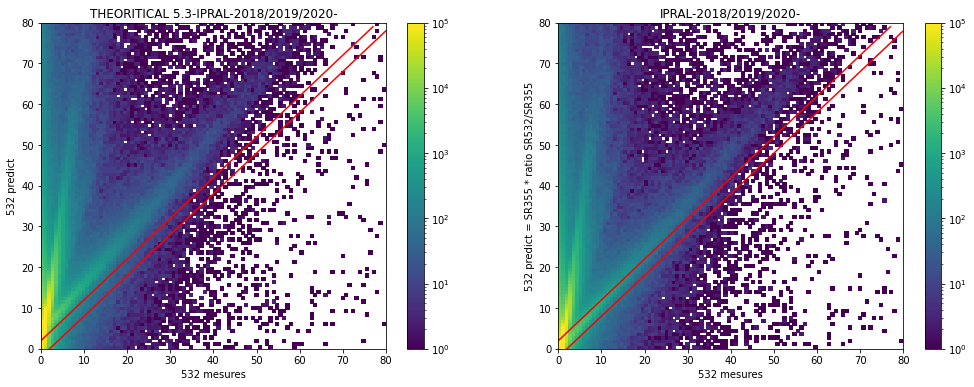

In [262]:
const = 5.3
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(17,6))
p = ax.hist2d(all_sr532.values.ravel(), all_sr355.values.ravel()*const, 
              norm=LogNorm(vmax=1e5), range=[[0,80], [0,80]], bins=100, density=False)
plt.colorbar(p[3], ax=ax)
ax.plot(np.arange(0,80,1)+2, np.arange(0,80,1), color='r')
ax.plot(np.arange(0,80,1)-2, np.arange(0,80,1), color='r')
# ax.plot(np.linspace(0,60,100), np.linspace(5,80, 100), 'r--')
# ax.plot(np.arange(0,10,0.125)+1.5, np.arange(0,80,1), color='r')
# ax.plot(np.arange(0,10,0.125)-1.5, np.arange(0,80,1), color='r')
# plt.title('all_sr355.values.ravel(), all_sr532.values.ravel()')
ax.set_title(f'THEORITICAL {const}-IPRAL-2018/2019/2020-')
ax.set_ylabel('532 predict')
ax.set_xlabel('532 mesures')

ratio_all = ratio(all_sr355.values, all_betamol355.values)
p = ax2.hist2d(all_sr532.values.ravel(), (all_sr355.values*ratio_all).ravel(), 
               norm=LogNorm(vmax=1e5), range=[[0,80], [0,80]], bins=100, density=False)
plt.colorbar(p[3], ax=ax2)
ax2.plot(np.arange(0,80,1)+2, np.arange(0,80,1), color='r')
ax2.plot(np.arange(0,80,1)-2, np.arange(0,80,1), color='r')
# plt.title('all_sr355.values.ravel(), all_sr532.values.ravel()')
ax2.set_title(f'IPRAL-2018/2019/2020-')
ax2.set_ylabel('532 predict = SR355 * ratio SR532/SR355')
ax2.set_xlabel('532 mesures')

[Text(0.5, 0, 'SR355'),
 Text(0, 0.5, 'R = SR532 / SR355'),
 Text(0.5, 1.0, 'IPRAL 2018-2019-2020')]

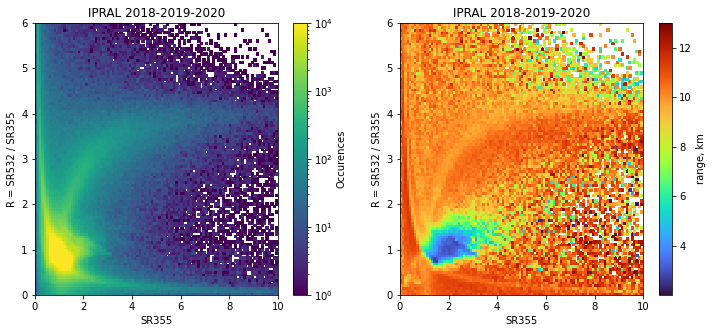

In [120]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
sums, xbins, ybins = np.histogram2d(all_sr355.values.ravel(), (all_sr532/all_sr355).values.ravel(), 
                                    weights=np.tile(all_sr355.range.values, all_sr355.time.shape[0]).ravel()/1e3,
                                   bins = 100, range=[[0,10], [0,6]])
counts, _, _ = np.histogram2d(all_sr355.values.ravel(), (all_sr532/all_sr355).values.ravel(),
                              bins = 100, range=[[0,10], [0,6]])

# _, _, _, ima = ax[0].hist2d(all_sr355.values.ravel(), (all_sr532/all_sr355).values.ravel(),
#           bins=100, range=[[1,100], [0,6]], norm=LogNorm(vmax=1e4))
with np.errstate(divide='ignore', invalid='ignore'):
    ima = ax[0].pcolormesh(xbins, ybins, (counts).T, norm=LogNorm(vmax=1e4), cmap='viridis')
plt.colorbar(ima, ax = ax[0], label='Occurences')
ax[0].set(xlabel = 'SR355', 
         ylabel = 'R = SR532 / SR355',
         title = 'IPRAL 2018-2019-2020')
# ax[0].set_xscale('log')
# ax[0].set_xlim(0, 1e1)


cmap = mpl.cm.turbo
bounds = np.arange(0,14,0.5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='neither')
with np.errstate(divide='ignore', invalid='ignore'):
    ima = ax[1].pcolormesh(xbins, ybins, (sums/counts).T, cmap=cmap)
# ima = ax[1].hist2d(ipral_sr355.values.ravel(), (ipral_sr532/ipral_sr355).values.ravel(), 
#                             weights=np.tile(ipral_sr355.range.values, ipral_sr355.time.shape[0]).ravel()/1e3, #ipral_betamol355.values.ravel()*1e3,
#           bins=100, range=[[0,10], [0,6]], cmap='turbo')
cbar = plt.colorbar(ima, ax=ax[1], label='range, km') 
ax[1].set(xlabel = 'SR355', 
         ylabel = 'R = SR532 / SR355',
         title = 'IPRAL 2018-2019-2020')
# ax[1].set_xscale('log')
# ax[1].set_xlim(0, 1e1)

In [278]:
all_sr355.values[4100,:]*const, ratio_all[4100,:]*all_sr355.values[4100,:], all_sr355.values[4100,:], ratio_all[4100,:] 

(array([ 2.78830114e-06,  1.08877501e-05,  5.49727208e-03, ...,
         4.73993524e+00,  8.89212115e+00, -2.50840632e+00]),
 array([-4.29999721, -4.29998911, -4.29450273, ...,  0.43993524,
         4.59212115, -6.80840632]),
 array([ 5.26094555e-07,  2.05429246e-06,  1.03722115e-03, ...,
         8.94327404e-01,  1.67775871e+00, -4.73284211e-01]),
 array([-8.17343037e+06, -2.09317280e+06, -4.14039256e+03, ...,
         4.91917432e-01,  2.73705696e+00,  1.43854499e+01]))

(<xarray.DataArray 'range' (range: 1333)>
 array([1.5000e+01, 3.0000e+01, 4.5000e+01, ..., 1.9965e+04, 1.9980e+04,
        1.9995e+04], dtype=float32)
 Coordinates:
   * range       (range) float32 15.0 30.0 45.0 ... 1.996e+04 1.998e+04 2e+04
     wavelength  int64 ...,
 <xarray.DataArray 'range' (range: 1333)>
 array([1.5000e+01, 3.0000e+01, 4.5000e+01, ..., 1.9965e+04, 1.9980e+04,
        1.9995e+04], dtype=float32)
 Coordinates:
   * range       (range) float32 15.0 30.0 45.0 ... 1.996e+04 1.998e+04 2e+04
     wavelength  int64 ...)

In [279]:
all_sr355.values[4100,:] - all_betamol355.values[4100,:]

array([-7.64037680e-06, -6.10212863e-06,  1.02907479e-03, ...,
        8.94327041e-01,  1.67775835e+00, -4.73284572e-01])

In [274]:
all_sr355.values.ravel().shape, (ratio_all.ravel()*all_sr355.values.ravel()).shape

<ipython-input-274-a29972ac0f5b>:1: RuntimeWarning: invalid value encountered in multiply
  all_sr355.values.ravel().shape, (ratio_all.ravel()*all_sr355.values.ravel()).shape


((18796633,), (18796633,))

<ipython-input-271-506024b73270>:2: RuntimeWarning: invalid value encountered in multiply
  plt.hist2d(all_sr532.values.ravel()[ratio_all.ravel() < 2], ratio_all.ravel()[ratio_all.ravel() < 2]*all_sr355.values.ravel()[ratio_all.ravel() < 2],


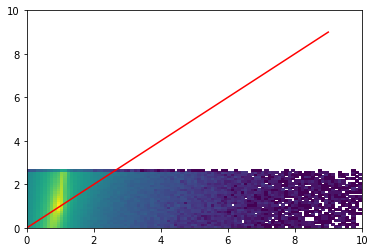

In [271]:
# ratio_all.ravel()[ratio_all.ravel() < 2]*all_sr355.values.ravel()[ratio_all.ravel() < 2], all_sr532.values.ravel()
plt.hist2d(all_sr532.values.ravel()[ratio_all.ravel() < 2], ratio_all.ravel()[ratio_all.ravel() < 2]*all_sr355.values.ravel()[ratio_all.ravel() < 2], 
          bins=100, range=[[0,10], [0,10]], norm=LogNorm())
plt.plot(np.arange(0,10,1), np.arange(0,10,1), color='r')

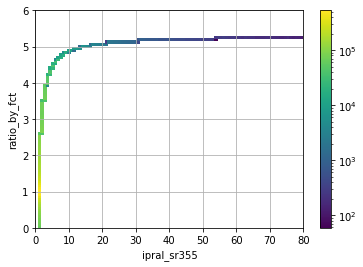

In [265]:
plt.hist2d(all_sr355.values.ravel()*ratio_all.ravel(), ratio_all.ravel(), bins=100, range=[[0,80], [0,6]], norm=LogNorm())
plt.colorbar()
plt.xlabel('ipral_sr355')
plt.ylabel('ratio_by_fct')
plt.grid()

In [56]:
import sys
sys.path.append('/homedata/nmpnguyen/comparaison/Codes/')
import fonctions 

import importlib
importlib.reload(fonctions)


<module 'fonctions' from '/homedata/nmpnguyen/comparaison/Codes/fonctions.py'>

In [173]:
pts = fonctions.check(0, 0, 60, 80, 2, all_sr532.values.ravel(), all_sr355.values.ravel()*const)


In [174]:
np.where(pts.check_point())

(array([       0,        1,        2, ..., 18796629, 18796630, 18796631]),)

In [175]:
time_tile = np.tile(all_sr532.time.values, all_sr532.range.shape[0])
time_tile.shape, all_sr532.values.ravel().shape

((18796633,), (18796633,))

In [176]:
time_line= pd.to_datetime(time_tile[pts.check_point()])
counts_time = time_line.to_period('D').value_counts()

In [177]:
counts_time[counts_time == counts_time.max()]

2020-06-24    14933
Freq: D, dtype: int64

Text(0.5, 1.0, 'IPRAL QL: day where points in special line are max \n2020-06-24    82078\nFreq: D, dtype: int64')

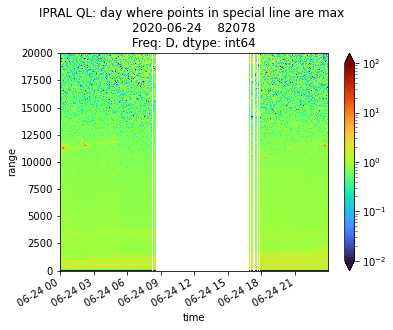

In [158]:
d = xr.open_dataset('/homedata/nmpnguyen/IPRAL/NETCDF/v_simple/2020/ipral_1a_Lz1R15mF30sPbck_v01_20200624_000000_1440.nc')
(d['calibrated']/d['simulated']).where(d['flags']==0).sel(wavelength=532).plot(x='time', y='range', norm=LogNorm(vmin=1e-2, vmax=1e2), ylim=(0,20000), cmap='turbo')
plt.title(f'IPRAL QL: day where points in special line are max \n{counts_time[counts_time == counts_time.max()]}')

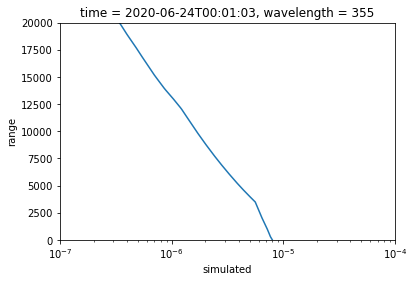

In [204]:
d = xr.open_dataset('/homedata/nmpnguyen/IPRAL/NETCDF/v_simple/2020/ipral_1a_Lz1R15mF30sPbck_v01_20200624_000000_1440.nc')
d['simulated'].sel(wavelength=355).isel(time=3).plot(y='range', ylim=(0,20000), xscale='log', xlim=(1e-7, 1e-4))

Text(0.5, 1.0, 'IPRAL QL: day where points in special line are max \n2020-06-24    82078\nFreq: D, dtype: int64')

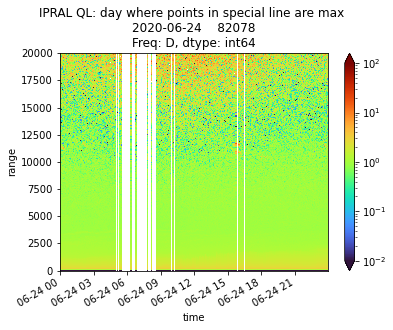

In [159]:
(d['calibrated']/d['simulated']).where(d['flags']==0).sel(wavelength=355).plot(x='time', y='range', norm=LogNorm(vmin=1e-2, vmax=1e2), ylim=(0,20000), cmap='turbo')
plt.title(f'IPRAL QL: day where points in special line are max \n{counts_time[counts_time == counts_time.max()]}')

In [140]:
xx = (d['calibrated']/d['simulated']).where((d['flags']==0) & (d['range']<20000), drop=True).sel(wavelength=355)
yy = (d['calibrated']/d['simulated']).where((d['flags']==0) & (d['range']<20000), drop=True).sel(wavelength=532)

In [164]:
(xx.time == yy.time).sum()

<xarray.DataArray 'time' ()>
array(2004)

Text(0.5, 1.0, 'IPRAL : day where points in special line are max \n2020-06-24    82078\nFreq: D, dtype: int64')

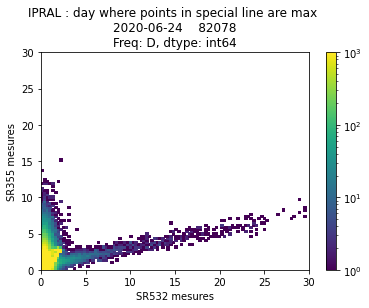

In [147]:
plt.hist2d(yy.values.ravel(), xx.values.ravel(), range=[[0,30], [0,30]], norm=LogNorm(vmax=1e3), bins=100)
plt.colorbar()
plt.xlabel('SR532 mesures')
plt.ylabel('SR355 mesures')
plt.title(f'IPRAL : day where points in special line are max \n{counts_time[counts_time == counts_time.max()]}')

Text(0.5, 1.0, 'IPRAL : day where points in special line are max \n2020-06-24    14933\nFreq: D, dtype: int64')

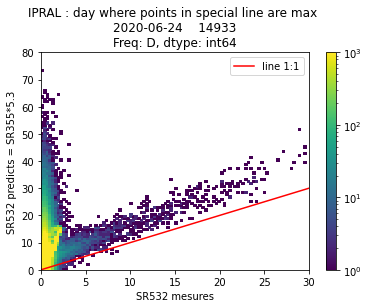

In [256]:
plt.hist2d(yy.values.ravel(), xx.values.ravel()*const, range=[[0,30], [0,80]], norm=LogNorm(vmax=1e3), bins=100)
plt.colorbar()
# plt.plot(np.arange(0,10,0.125)+1.5, np.arange(0,80,1), color='r')
# plt.plot(np.arange(0,10,0.125)-1.5, np.arange(0,80,1), color='r')
plt.plot(np.arange(0,80,1), np.arange(0,80,1), color='r', label='line 1:1')
plt.legend()
plt.xlabel('SR532 mesures')
plt.ylabel(f'SR532 predicts = SR355*{const}')
plt.title(f'IPRAL : day where points in special line are max \n{counts_time[counts_time == counts_time.max()]}')

## THEORIE APPROUVE AVEC HSRL-ER2
----------------------

- SCATTERPLOT SR355 VS RATIO SR532/SR355
- SCATTERPLOT BETA_PARTICLES_355 VS RATIO SR532/SR355
- CURVE FITTING ON SCATTERPLOT BETA_PARTICLES_355 VS RATIO SR532/SR355
- QUANTIFY THEORITICAL RESULTS VS NEW COEFF'S RESULTS 

In [2]:
def set_3th_data_histogram2d(xdata, ydata, cdata, range_data, bin_data):
    counts_data, xdata_edges, ydata_edges = np.histogram2d(xdata, ydata, range=range_data, bins=bin_data)
    sums_data, _, _ = np.histogram2d(xdata, ydata, weights=cdata, range=range_data, bins=bin_data)
    data_3th = sums_data/counts_data
    return data_3th

def set_proba_histogram2d(xdata, ydata, range_data, bin_data):
    counts_data, xdata_edges, ydata_edges = np.histogram2d(xdata, ydata, range=range_data, bins=bin_data)
    proba_data = counts_data/xdata.shape[0]
    return proba_data, xdata_edges, ydata_edges

In [3]:
maindir = Path('/homedata/nmpnguyen/ORACLES-ER2/')
listfiles = sorted(maindir.glob('HSRL2_ER2*_R8.h5'))

param_all = []
sr355_all = []
sr532_all = []
ratio_all = []
aer_355_all = []
aer_532_all = []
# fig, axs = plt.subplots(nrows = 4, ncols = 2, sharey=True, sharex=True, figsize = (15,15), constrained_layout=True)
for pathfile in listfiles:
    print(pathfile)
    DataProducts = xr.open_dataset(pathfile, group = 'DataProducts')
    bsc_aer_532 = DataProducts['532_bsc'].values
    bsc_aer_355 = DataProducts['355_bsc'].values
    pathfile = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', pathfile.stem + '_v2.nc')
    file = xr.open_dataset(pathfile)
    sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
    sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values
    ratio = sr_532/sr_355
    
    sr355_all.append(sr_355.ravel())
    sr532_all.append(sr_532.ravel())
    ratio_all.append(ratio.ravel())
    aer_355_all.append(bsc_aer_532.ravel())
    aer_532_all.append(bsc_aer_355.ravel())

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


In [4]:
ratio_all = np.concatenate(ratio_all)
sr355_all = np.concatenate(sr355_all)
sr532_all = np.concatenate(sr532_all)

In [5]:
aer_355_all = np.concatenate(aer_355_all)
aer_532_all = np.concatenate(aer_532_all)

In [6]:
sr532_all.shape, ratio_all.shape, sr355_all.shape, aer_355_all.shape

((28888207,), (28888207,), (28888207,), (28888207,))

<ipython-input-45-66227f4b1484>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_over('black')
<ipython-input-45-66227f4b1484>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_under('lightgrey')


Text(0.5, 1.0, 'HSRL2-ER2')

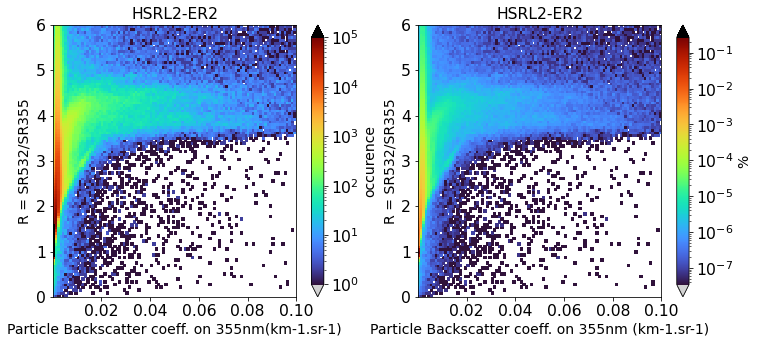

In [45]:
'''
Scatterplot de Ratio vs beta part 
---------------------------------
'''
import matplotlib as mpl

cmap = mpl.cm.turbo
cmap.set_over('black')
cmap.set_under('lightgrey')

fig, (ax, ax1) = plt.subplots(ncols =2, figsize=(12,5))
plt.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 'small'
p = ax.hist2d(aer_355_all, ratio_all, bins=100, range=[[1e-6, 1e-1], [0,6]], norm=LogNorm(vmax=1e5), cmap=cmap)
plt.colorbar(p[3], ax=ax, label='occurence', extend='both')
ax.set_xlabel('Particle Backscatter coeff. on 355nm(km-1.sr-1)')
ax.set_ylabel('R = SR532/SR355')
ax.set_title('HSRL2-ER2')

Hpropas, xedges, yedges = set_proba_histogram2d(xdata=aer_355_all, ydata=ratio_all, range_data=[[1e-6, 1e-1], [0,6]], bin_data=100)
p = ax1.pcolormesh(xedges, yedges, Hpropas.T, norm=LogNorm(), cmap='turbo')
cb = plt.colorbar(p, ax=ax1, extend='both', label='%')
ax1.set(#title=f'ER2: SR532 measured vs SR532 predicted \n', 
        ylabel='R = SR532/SR355', xlabel='Particle Backscatter coeff. on 355nm (km-1.sr-1)')
plt.title('HSRL2-ER2')

<ipython-input-54-4c3b62f6a89b>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_over('black')
<ipython-input-54-4c3b62f6a89b>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_under('lightgrey')


[Text(0, 0.5, 'R = SR532/SR355'), Text(0.5, 0, 'SR355 MEASURED')]

<Figure size 432x288 with 0 Axes>

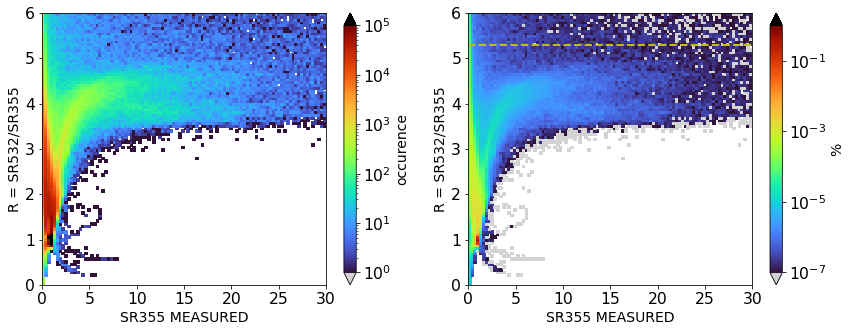

In [54]:
'''
Scatterplot de Ratio vs beta part 
---------------------------------
'''
import matplotlib as mpl

cmap = mpl.cm.turbo
cmap.set_over('black')
cmap.set_under('lightgrey')

plt.clf()
fig, (ax, ax1) = plt.subplots(ncols =2, figsize=(14,5))
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'large'
p = ax.hist2d(sr355_all, ratio_all, bins=100, range=[[0, 30], [0,6]], norm=LogNorm(vmax=1e5), cmap=cmap)
plt.colorbar(p[3], ax=ax, label='occurence', extend='both')
ax.set_xlabel('SR355 MEASURED')
ax.set_ylabel('R = SR532/SR355')
# ax.set_title('HSRL2-ER2')

Hpropas, xedges, yedges = set_proba_histogram2d(xdata=sr355_all, ydata=ratio_all, range_data=[[0,30], [0,6]], bin_data=100)
p = ax1.pcolormesh(xedges, yedges, Hpropas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmap)
cb = plt.colorbar(p, ax=ax1, extend='both', label='%')
ax1.axhline(5.3, color='y', linestyle='--', linewidth=2)
ax1.set(#title=f'ER2: SR532 measured vs SR532 predicted \n', 
        ylabel='R = SR532/SR355', xlabel='SR355 MEASURED')
# plt.title('HSRL2-ER2')

In [77]:
# Hpropas, xedges, yedges = set_proba_histogram2d(xdata=aer_355_all, ydata=ratio_all, range_data=[[1e-6, 1e-1], [0,6]], bin_data=100)

# fig, ax1 = plt.subplots()
# plt.rcParams['font.size']=13
# p = ax1.pcolormesh(xedges, yedges, Hpropas.T, norm=LogNorm(), cmap='turbo')
# cb = plt.colorbar(p, ax=ax1, extend='both', label='%')
# ax1.set(#title=f'ER2: SR532 measured vs SR532 predicted \n', 
#         ylabel='R = SR532/SR355', xlabel='Particle Backscatter coeff. on 355nm (km-1.sr-1)')
# plt.title('HSRL2-ER2')

In [55]:
### pcolormesh dont le colorbar est ratio 532/355 --> labes of all dataset
#-------------------------------------------------------------------------

ratio_counts, xbins, ybins = np.histogram2d(sr355_all, sr532_all,
                                           bins = 100, range = [[0,30], [0, 80]])
ratio_sums, xbins, ybins = np.histogram2d(sr355_all, sr532_all,
                                          weights= ratio_all,
                                           bins = 100, range = [[0,30], [0, 80]])
ratio_mean = ratio_sums/ratio_counts

<ipython-input-55-85752ad36037>:8: RuntimeWarning: invalid value encountered in true_divide
  ratio_mean = ratio_sums/ratio_counts


In [56]:
# LABELS OF ALL DATASET
#----------------------

ratio_labels = np.full(ratio_all.shape, np.nan)

ratio_labels[np.logical_and(sr355_all < 1.3, sr532_all < 1.3)] = 1#'R = (-inf, 1.3)'
ratio_labels[np.logical_and(ratio_all >= 1.3, ratio_all < 4.7)] = 2#'R = [1.3, 5)'
ratio_labels[np.logical_and(ratio_all >= 4.7, ratio_all <= 5.3)] = 3#'R = [5.0, 5.3]'
ratio_labels[(ratio_all > 5.3)] = 4#'R = (5.3, +inf)'


df = pd.DataFrame(np.concatenate([sr355_all.reshape(-1,1), sr532_all.reshape(-1,1), ratio_labels.reshape(-1,1), aer_355_all.reshape(-1,1), aer_532_all.reshape(-1,1)], axis=1),
            columns=['sr355', 'sr532', 'labels', 'betapart355', 'betapart532'])


In [57]:
df['sr355_edges'] = pd.cut(df['sr355'], 
                           pd.interval_range(start=0, end=30, periods=100, closed='left'))
df['sr532_edges'] = pd.cut(df['sr532'],
                           pd.interval_range(start=0, end=80, periods=100, closed='left'))
df['betapart355_edges'] = pd.cut(df['betapart355'],
                                pd.interval_range(start=1e-6, end=1e-1, periods=100, closed='left'))
df['betapart532_edges'] = pd.cut(df['betapart532'],
                                pd.interval_range(start=1e-6, end=1e-1, periods=100, closed='left'))
df

,sr355,sr532,labels,betapart355,betapart532,sr355_edges,sr532_edges,betapart355_edges,betapart532_edges
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28888202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28888203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28888204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28888205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# df_groupbed_sr = df.groupby(['labels', 'sr355_edges', 'sr532_edges']).size()

In [10]:
# df_groupbed_sr = df_groupbed_sr.reset_index()
# df_groupbed_sr.rename(columns={0 :'sizes'}, inplace=True)

In [11]:
# df_groupbed_sr['sr355_edges'] = pd.IntervalIndex(df_groupbed_sr['sr355_edges']).left 
# df_groupbed_sr['sr532_edges'] = pd.IntervalIndex(df_groupbed_sr['sr532_edges']).left
# df_groupbed_sr

In [12]:
# df_groupbed_sr['sizes'] = df_groupbed_sr['sizes'].replace(0, np.nan)
# df_groupbed_sr

In [45]:
# Objective function to curve fitting
#------------------------------------
from scipy.optimize import curve_fit

def equation_532(x, a, beta):
    # for 532nm 
    return a*(beta+x)/((beta)*(a)+x)

def equation_355(x, a, beta):
    # for 355nm 
    return a*(beta/a + x)/(beta + x)

class objective_function:
    def __init__(self, x, a, b):
        self.x = x
        self.a = a
        self.b = b         
    def log_function(self):
    #     return b + a*np.log(x)
        return self.a/(self.b + self.x)

def test_function(x, A, B, C, D):
    return D + (A - D)/(1 + (x/C)**B)

In [42]:
def fitting_processus(x, y, lim_x, lim_y, objective_function = None, degree = None):
    '''
    Curve fitting with objection function
    '''

    # with objective function 
    #-------------------------
    ids = np.where((y >= lim_y[0])&(y < lim_y[1])&(x >= lim_x[0])&(x < lim_x[1]))
    def test_function(x, A, B, C, D):
        return D + (A - D)/(1 + (x/C)**B) #(a*x) / (x + b)
    
    params_fitted, _ = curve_fit(test_function, x[ids], y[ids],)
#     if degree is not None:
# #         param_fitted = np.polyfit(np.exp(x[ids]), y[ids], degree)   
#         param_fitted = np.polyfit(a*x[ids]/(b+x[ids], y[ids], degree))
#     if objective_function is not None:
        
#         param_fitted, _ = curve_fit(objective_function, x[ids], y[ids], p0=[1])
        
    return params_fitted, ids

# idx = np.where((ratio_all > 0)&(ratio_all <= 6)&(sr355_all >= 0.5)&(sr355_all < 30))
# param_logfunc = np.polyfit(np.log(sr355_all[idx]), ratio_all[idx], 1)
# print(param_logfunc)



In [43]:
params_logfunc = [] 
params_idxs = []
list_xlim = [[1e-6, 1e-1]]#[[1e-2, 1e-1]] #
list_ylim = [[1,5]]#[[1,5]] #

for i in range(len(list_xlim)):
    params_idxs.append(fitting_processus((aer_355_all[:np.int_(aer_355_all.shape[0]/2)]), ratio_all[:np.int_(aer_355_all.shape[0]/2)], list_xlim[i], list_ylim[i], objective_function=test_function))
# params_idxs.append(fitting_processus((aer_355_all), ratio_all, [1e-2, 1e-1], [3.5, 5], degree=1))

# params_idxs.append(fitting_processus((aer_355_all), ratio_all, [1e-6, 1e-1], [3, 4.8], degree=1))

<ipython-input-42-453777dbc593>:10: RuntimeWarning: invalid value encountered in power
  return D + (A - D)/(1 + (x/C)**B) #(a*x) / (x + b)


In [44]:
params_idxs

[(array([1.03470134e+00, 1.01069078e+00, 3.79752211e-03, 4.67580060e+00]),
  (array([  596049,   596050,   596051, ..., 14246668, 14246669, 14246670]),))]

In [11]:
params_logfunc = [p[0] for p in params_idxs]
idxs_logfunc = [p[1] for p in params_idxs]
params_logfunc, idxs_logfunc

([(1.9357347335924393, 1.1999878677218562e-05)],
 [(array([  596049,   596050,   596051, ..., 28676959, 28676960, 28676961]),)])

In [12]:
# for special plot: apply only f(x) for all blocks of data 
params_logfunc = params_idxs[0][0]
params_logfunc, idxs_logfunc

((1.9357347335924393, 1.1999878677218562e-05),
 [(array([  596049,   596050,   596051, ..., 28676959, 28676960, 28676961]),)])

<ipython-input-122-a2c8b6b24b5b>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmapp.set_over('black')
<ipython-input-122-a2c8b6b24b5b>:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmapp.set_under('lightgrey')
<ipython-input-122-a2c8b6b24b5b>:106: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


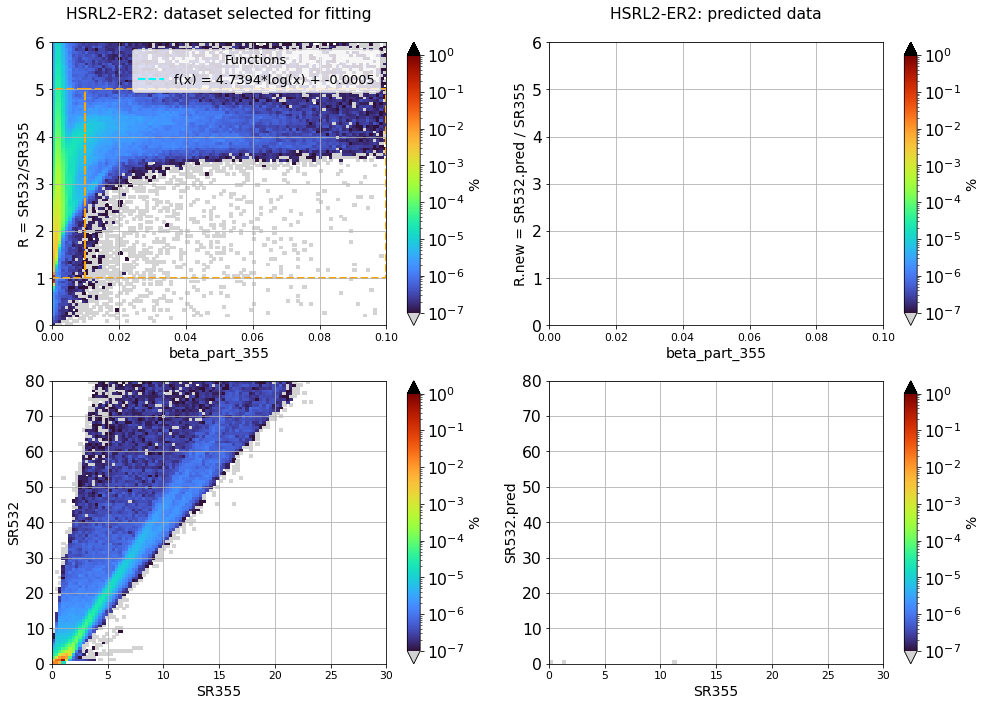

In [122]:
'''
Reconcilier nouvel Ratio et SR532 by F(x)
'''
import matplotlib as mpl
from matplotlib.patches import Rectangle

fig, ((ax, ax2), (ax3, ax1)) = plt.subplots(ncols =2, nrows=2, figsize=(14,10))
cmapp = mpl.cm.turbo
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13
# plt.rcParams['xtick.labelsize'] = 'small'

# setting variables (raw & predicted)
new_ratio_all = np.full(ratio_all.shape, np.nan)
new_sr532_all = np.full(sr532_all.shape, np.nan)
function_text = []

idxs = idxs_logfunc[0]

function_text.append(f'f(x) = {np.round(params_logfunc[0], 4)}*log(x) + {np.round(params_logfunc[1], 4)}')
figsave_text = f'HSRL2-ER2-LogFit-deg1-xBetapart-yRatio'


# new_ratio_all = param_logfunc[0]*(sr355_all**2) + param_logfunc[1]*sr355_all + param_logfunc[2]
# new_sr532_all = new_ratio_all * sr355_all
# function_text = f'f(x) = {np.round(param_logfunc[0], 4)}*x^2 + {np.round(param_logfunc[1],4)}*x + {np.round(param_logfunc[2], 2)}'
# figsave_text = f'HSRL2-ER2-PolynomialFit-deg2-xSR355-yRatio'

#p : scatter plot
Probas, xedges, yedges = set_proba_histogram2d(xdata=aer_355_all, ydata=ratio_all, 
                                               range_data=[[1e-6, 1e-1], [0, 6]], bin_data=100)
p = ax.pcolormesh(xedges, yedges, Probas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmapp)


for i in range(len(list_xlim)): 
#     param_logfunc = params_logfunc[i]
    idxs = idxs_logfunc[i]
    new_ratio_all[idxs] = params_logfunc[0]*np.log(aer_355_all[idxs]) + params_logfunc[1]
    new_sr532_all[idxs] = new_ratio_all[idxs] * sr355_all[idxs]
    
    #p : add grid of repartition data 
    ax.add_patch(Rectangle((list_xlim[i][0], list_ylim[i][0]), 
                           list_xlim[i][1]-list_xlim[i][0], list_ylim[i][1]-list_ylim[i][0],
                           edgecolor='orange', facecolor='none', lw=2, linestyle='--'))
#     ax.plot(np.arange(list_xlim[i][0], list_xlim[i][1], 1e-4), 
#             param_logfunc[0]*np.log(np.arange(list_xlim[i][0], list_xlim[i][1], 1e-4)) + param_logfunc[1], 
#             linestyle='--', linewidth=2, label=f'{function_text}')


#p2 : scatter plot
Probas, xedges, yedges = set_proba_histogram2d(xdata=aer_355_all, ydata=new_ratio_all, 
                                               range_data=[[1e-6, 1e-1], [0, 6]], bin_data=100)
p2 = ax2.pcolormesh(xedges, yedges, Probas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmapp)
#p3 : scatter plot
Probas, xedges, yedges = set_proba_histogram2d(xdata=sr355_all, ydata=sr532_all, 
                                               range_data=[[0, 30], [0, 80]], bin_data=100)
p3 = ax3.pcolormesh(xedges, yedges, Probas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmapp)
#p1 : scatter plot
Probas, xedges, yedges = set_proba_histogram2d(xdata=sr355_all, ydata=new_sr532_all, 
                                               range_data=[[0, 30], [0, 80]], bin_data=100)
p1 = ax1.pcolormesh(xedges, yedges, Probas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmapp)


#-------------------------------------------------------------
# when i=1, then idxs = idxs_logfunc[1]
ax.plot(np.arange(1e-6, 1e-1, 1e-4), 
        params_logfunc[0]*np.log(np.arange(1e-6, 1e-1, 1e-4)) + params_logfunc[1], 
        linestyle='--', linewidth=2,
        label=f'{function_text[0]}')
#---------------------------------------------------------------------

colormap = plt.cm.cool 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
    
plt.colorbar(p, ax=ax, label='%', extend='both')
ax.legend(title='Functions')
ax.grid(axis='both')
ax.set_xlabel('beta_part_355')
ax.set_ylabel('R = SR532/SR355')
ax.set_title('HSRL2-ER2: dataset selected for fitting\n ')
ax.set_xlim(-1e-6, 1e-1)
ax.set_ylim(0,6)

plt.colorbar(p2, ax=ax2, label='%', extend='both')
# ax2.text(2.5, 5, f'curve fitting \n{function_text}', size=12, ha='left', va='center')
ax2.grid(axis='both')
ax2.set_xlabel('beta_part_355')
ax2.set_ylabel('R.new = SR532.pred / SR355')
ax2.set_title('HSRL2-ER2: predicted data\n ')
ax2.set_xlim(-1e-6, 1e-1)
ax2.set_ylim(0,6)

plt.colorbar(p1, ax=ax1, label='%', extend='both')
ax1.grid(axis='both')
ax1.set_xlabel('SR355')
ax1.set_ylabel('SR532.pred')

plt.colorbar(p3, ax=ax3, label='%', extend='both')
ax3.grid(axis='both')
ax3.set_xlabel('SR355')
ax3.set_ylabel('SR532')

plt.tight_layout()
# plt.savefig(Path('/homedata/nmpnguyen/ORACLES-ER2/', figsave_text+'.png'))



<ipython-input-75-f7de7c005086>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmapp.set_over('black')
<ipython-input-75-f7de7c005086>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmapp.set_under('lightgrey')


Text(0, 0.5, 'R = SR532/SR355')

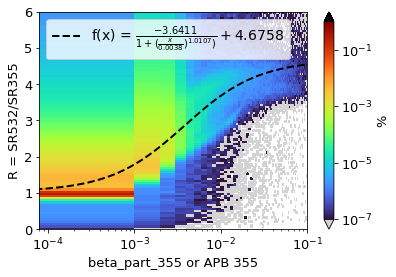

In [75]:
import matplotlib as mpl

cmapp = mpl.cm.turbo
cmapp.set_over('black')
cmapp.set_under('lightgrey')
plt.rcParams['font.size'] = 13

# D + (A - D)/(1 + (x/C)**B)
A, B, C, D = (np.round(I,4) for I in params_idxs[0][0])
function_text = (f'f(x) = {D} + ({A-D})/(1 + (x/{C})**{B})')

Probas, xedges, yedges = set_proba_histogram2d(xdata=aer_355_all, ydata=ratio_all, 
                                               range_data=[[1e-6, 1e-1], [0, 6]], bin_data=100)
p = plt.pcolormesh(xedges, yedges, Probas.T, norm=LogNorm(vmin=1e-7, vmax=1e0), cmap=cmapp)
plt.colorbar(p, extend='both', label='%')
plt.plot(np.linspace(1e-6, 1e-1, 10000), 
        test_function(np.linspace(1e-6, 1e-1, 10000), *params_idxs[0][0]), 
        linestyle='--', linewidth=2, color = 'black',
        label=r'f(x) = $\frac{-3.6411}{1 + (\frac{x}{0.0038})^{1.0107})} + 4.6758 $')
plt.legend(loc = 'upper left', prop={'size': 14})
plt.semilogx()
plt.xlim(8e-5, 1e-1)
plt.ylim(0,6)
# plt.grid(axis='both')
plt.xlabel('beta_part_355 or APB 355')
plt.ylabel('R = SR532/SR355')



In [67]:
A-D, D, B, C

(-3.6411, 4.6758, 1.0107, 0.0038)

In [35]:
# # g = df.groupby(['sr355_edges', 'sr532_edges'])
# g = df.groupby(['betapart355_edges', 'betapart532_edges'])
# df_filted = g.filter(lambda x: len(x) > 1e3)
# # aer_355_all[np.isin(sr355_all,df_filted['sr355'])].shape, df_filted.shape


In [81]:
# df['R'] = df['sr532']/df['sr355']
df['R_edges'] = pd.cut(df['R'], pd.interval_range(start=0, end=10, freq=0.2, closed='left'))
df.dropna()

,sr355,sr532,labels,betapart355,betapart532,sr355_edges,sr532_edges,betapart355_edges,betapart532_edges,R,R_edges
596049,0.937336,1.110126,1.0,0.000309,0.000561,"[0.8999999999999999, 1.2)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.184342,"[0.8999999999999999, 1.2)"
596050,0.922708,1.103369,1.0,0.000283,0.000421,"[0.8999999999999999, 1.2)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.195794,"[0.8999999999999999, 1.2)"
596051,0.932876,1.100345,1.0,0.000285,0.000371,"[0.8999999999999999, 1.2)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.179519,"[0.8999999999999999, 1.2)"
596052,0.931202,1.095315,1.0,0.000278,0.000496,"[0.8999999999999999, 1.2)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.176238,"[0.8999999999999999, 1.2)"
596053,0.917252,1.075016,1.0,0.000245,0.000464,"[0.8999999999999999, 1.2)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.171996,"[0.8999999999999999, 1.2)"
...,...,...,...,...,...,...,...,...,...,...,...
28676957,0.885281,0.966764,1.0,0.000017,0.000013,"[0.6, 0.8999999999999999)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.092043,"[0.8999999999999999, 1.2)"
28676958,0.876536,0.957355,1.0,0.000016,0.000012,"[0.6, 0.8999999999999999)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.092203,"[0.8999999999999999, 1.2)"
28676959,0.868531,0.945085,1.0,0.000016,0.000011,"[0.6, 0.8999999999999999)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.088143,"[0.8999999999999999, 1.2)"
28676960,0.858700,0.932668,1.0,0.000016,0.000010,"[0.6, 0.8999999999999999)","[0.8, 1.6)","[1e-06, 0.00100099)","[1e-06, 0.00100099)",1.086140,"[0.8999999999999999, 1.2)"


In [101]:
(df.value_counts(subset=['R_edges', 'betapart355_edges'])< 1e3).index.get_level_values(0)

CategoricalIndex([[0.8999999999999999, 1.2),                [1.2, 1.5),
                  [1.5, 1.7999999999999998), [1.5, 1.7999999999999998),
                  [1.7999999999999998, 2.1), [1.7999999999999998, 2.1),
                                 [2.1, 2.4), [2.4, 2.6999999999999997),
                                 [2.1, 2.4),                [2.1, 2.4),
                  ...
                                 [0.0, 0.3),                [0.0, 0.3),
                                 [8.1, 8.4),                [1.2, 1.5),
                                 [1.2, 1.5),                [8.1, 8.4),
                                 [1.2, 1.5),                [8.1, 8.4),
                                 [1.2, 1.5),                [9.6, 9.9)],
                 categories=[[0.0, 0.3), [0.3, 0.6), [0.6, 0.8999999999999999), [0.8999999999999999, 1.2), [1.2, 1.5), [1.5, 1.7999999999999998), [1.7999999999999998, 2.1), [2.1, 2.4), ...], ordered=True, dtype='category', name='R_edges', length=2805)

In [103]:
df_counts = df.value_counts(subset=['R_edges', 'betapart355_edges'])

In [108]:
(df_counts[df_counts < 1e2]).index.get_level_values(0), (df_counts[df_counts < 1e2]).index.get_level_values(1)

(CategoricalIndex([[3.5999999999999996, 3.9), [3.5999999999999996, 3.9),
                                  [4.5, 4.8), [3.5999999999999996, 3.9),
                                  [6.3, 6.6), [3.5999999999999996, 3.9),
                   [5.1, 5.3999999999999995),                [4.8, 5.1),
                                  [4.8, 5.1), [5.1, 5.3999999999999995),
                   ...
                                  [0.0, 0.3),                [0.0, 0.3),
                                  [8.1, 8.4),                [1.2, 1.5),
                                  [1.2, 1.5),                [8.1, 8.4),
                                  [1.2, 1.5),                [8.1, 8.4),
                                  [1.2, 1.5),                [9.6, 9.9)],
                  categories=[[0.0, 0.3), [0.3, 0.6), [0.6, 0.8999999999999999), [0.8999999999999999, 1.2), [1.2, 1.5), [1.5, 1.7999999999999998), [1.7999999999999998, 2.1), [2.1, 2.4), ...], ordered=True, dtype='category', name='R_edges', length

In [109]:
df[['R_edges', 'betapart355_edges', 'R', 'betapart355']]

,R_edges,betapart355_edges,R,betapart355
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
28888202,NaN,NaN,NaN,NaN
28888203,NaN,NaN,NaN,NaN
28888204,NaN,NaN,NaN,NaN
28888205,NaN,NaN,NaN,NaN


In [98]:
# g = df.dropna().groupby(['betapart355_edges', 'sr532']).agg(occurences = ('R', 'count'))
df_filted = df[df.map(df.value_counts(subset=['R_edges', 'betapart355_edges'])) > 1e3]

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
# _, id1 = fitting_processus((aer_355_all), ratio_all, [1e-6, 1e-2], [0,4], degree=1)
# print(id1)
# # param1 = np.polyfit(np.log(aer_355_all[id1]), ratio_all[id1], 1)
# param1 = curve_fit(lambda x, a, b: (a+x)**b, aer_355_all[id1], ratio_all[id1])
# print(param1)

In [43]:
_, id1 = fitting_processus(df_filted['betapart355'].values, (df_filted['sr532']/df_filted['sr355']).values, [1e-6, 1e-2], [1,4], degree=1)
print(id1)
param1 = np.polyfit(np.log(df_filted['betapart355'].values[id1]),  (df_filted['sr532']/df_filted['sr355']).values[id1], 1)

print(param1)

(array([       0,        1,        2, ..., 18296156, 18296157, 18296158]),)
[0.22380639 3.50429873]


(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

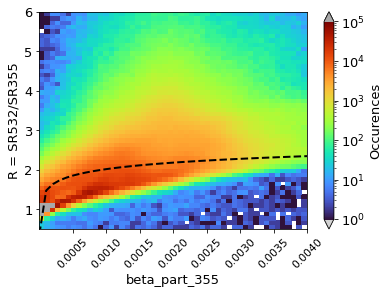

In [44]:
plt.plot(np.arange(1e-6, 1e-2, 1e-4), 0.23687978*np.log(np.arange(1e-6, 1e-2, 1e-4)) + 3.6520012,
        linestyle='--', c = 'k', linewidth=2, zorder=10)
# plt.plot(np.arange(1e-6, 1e-2, 1e-4), param1[0]*np.log(np.arange(1e-6, 1e-2, 1e-4)) + param1[1],
#         linestyle='--', c = 'orange', linewidth=2, zorder=10)
p = plt.hist2d(df_filted['betapart355'].values, (df_filted['sr532']/df['sr355']).values, 
               bins=50, range=[[1e-6, 0.004], [0.5,6]], norm=LogNorm(vmax=1e5, vmin=1e0), cmap=cmap)
plt.colorbar(p[3], label='Occurences', extend='both')
plt.ylabel('R = SR532/SR355')
plt.xlabel('beta_part_355')
plt.xticks(rotation = 45)
# plt.plot(np.arange(1e-6, 1e-1, 1e-4),  1 - 1/(1+param1[0][0]*np.arange(1e-6, 1e-1, 1e-4))**param1[0][1],
#          linestyle='--', c = 'orange', linewidth=2)

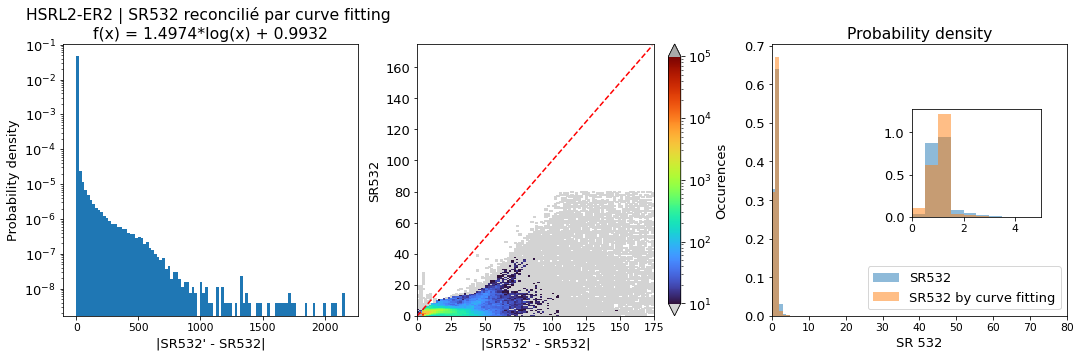

In [204]:

new_fig, (ax, ax1, ax3) = plt.subplots(ncols =3, nrows=1, figsize=(18,5))

# residus_counts = np.histogram(np.abs((new_sr532_all - sr532_all)[(sr532_all >=0) & (sr532_all < 80)]), 
#                               range=[0,2, bins=100)
# ax.bar(residus_counts[1][:-1], residus_counts[0]/sr532_all.shape[0], alpha=0.5, width=0.25)
h = ax.hist(np.abs((new_sr532_all - sr532_all)[idx]), 
                              bins=100, density=True)
ax.set(xlabel="|SR532' - SR532|", ylabel='Probability density',
      title= f'HSRL2-ER2 | SR532 reconcilié par curve fitting \n{function_text}')
ax.set_yscale('log')

pc = ax1.hist2d(sr532_all[idx], np.abs((new_sr532_all[idx] - sr532_all[idx])), bins=100, range=[[0, 175], [0, 80]],
                norm=LogNorm(vmax=1e5, vmin=1e1), cmap=cmap)
plt.colorbar(pc[3], ax=ax1, label='Occurences', extend='both')
ax1.set(xlabel="|SR532' - SR532|", ylabel='SR532', )
ax1.plot(np.arange(0,175,1), np.arange(0,175,1), linestyle='--', c='r')
ax1.set_xlim(0,175)
ax1.set_ylim(0,175)

ax3.hist(sr532_all, range=[0, 80], bins=81, density=True, label='SR532', alpha=0.5)
ax3.hist(new_sr532_all, range=[0, 80], bins=81, density=True, label='SR532 by curve fitting', alpha=0.5)
ax3.set(xlabel= 'SR 532', title = 'Probability density')
ax3.legend(loc='lower right')
ax3.set_xlim(0,80)

a = plt.axes([.78, .4, .1, .3], facecolor='w')
plt.hist(sr532_all, range=[0, 5], bins=10, density=True, label='SR532', alpha=0.5)
plt.hist(new_sr532_all, range=[0, 5], bins=10, density=True, label='SR532 by curve fitting', alpha=0.5)
plt.xlim(0,5)
fig.tight_layout()

plt.savefig(Path('/homedata/nmpnguyen/ORACLES-ER2', figsave_text+'_residus_histogram.png'))

(0.0, 5.0)

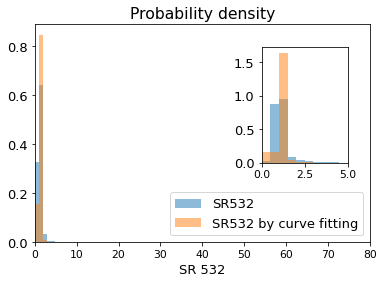

In [173]:
gif, ax= plt.subplots()

ax.hist(sr532_all, range=[0, 80], bins=81, density=True, label='SR532', alpha=0.5)
ax.hist(new_sr532_all, range=[0, 80], bins=81, density=True, label='SR532 by curve fitting', alpha=0.5)
ax.set(xlabel= 'SR 532', title = 'Probability density')
ax.legend(loc='lower right')
ax.set_xlim(0,80)

# this is an inset axes over the main axes
a = plt.axes([.65, .4, .2, .4], facecolor='w')
plt.hist(sr532_all, range=[0, 5], bins=10, density=True, label='SR532', alpha=0.5)
plt.hist(new_sr532_all, range=[0, 5], bins=10, density=True, label='SR532 by curve fitting', alpha=0.5)
plt.xlim(0,5)
# plt.xticks([])
# plt.yticks([])

In [213]:
'''
Confidence band/interval 
- with parameter t from Student's distribution
'''

from scipy.stats import t
mean_sr532_all = np.nanmean(sr532_all[idx])
std_sr532_all = np.nanstd(sr532_all[idx])
dof = len(sr532_all[idx]) - 1
confidence = 0.95

In [215]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
print(mean_sr532_all - std_sr532_all*t_crit/np.sqrt(len(sr532_all[idx])), mean_sr532_all + std_sr532_all*t_crit/np.sqrt(len(sr532_all[idx])))

1.7241621099622773 1.7381778007777657


In [ ]:
import seaborn as sn

sn.distplot(np.abs((new_sr532_all - sr532_all)[(sr532_all >=0) & (sr532_all < 80)]),
           bins=80, hist=True, range=[])

In [129]:
# with linear function
#---------------------
param_all=[]
for n in np.arange(0, 0.1, 0.02):
    idx = np.where((ratio_all > 0)&(ratio_all <= 6)&(aer_355_all >= (n-0.02))&(aer_355_all < n))
    aer_355_all_minor = aer_355_all[idx]
    ratio_all_minor = (ratio_all)[idx]
    param, _ = curve_fit(equation_355, aer_355_all_minor, ratio_all_minor)
    print(param)
    param_all.append(param)

param_all = pd.DataFrame(param_all, index=np.arange(0, 0.1, 0.02), columns=['a', 'beta'])
param_all.to_csv(Path(maindir, 'coeff_estimated_by_fitting_Ratio_Betapar355_multiintervals.csv'))
param_all

,a,beta
0.00,-4.159339e+06,33148.446286
0.02,4.767455e+00,0.003221
0.04,4.326606e+00,0.001279
0.06,4.326294e+00,0.001213
0.08,4.430798e+00,0.002674


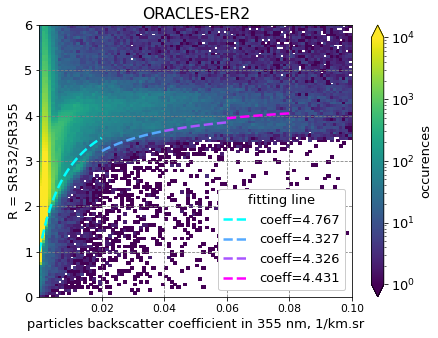

In [135]:
fg, ax = plt.subplots(figsize=(7,5))
counts, xbins, ybins = np.histogram2d(aer_355_all, ratio_all, 
                                     range = [[1e-6, 1e-1], [0,6]], bins = 100)

pax = ax.pcolormesh(xbins, ybins, counts.T, norm=LogNorm(vmax=1e4))
plt.colorbar(pax, ax=ax, label='occurences', extend='both')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')
# plt.xscale('log')
plt.xlabel('particles backscatter coefficient in 355 nm, 1/km.sr')
plt.ylabel('R = SR532/SR355')
plt.title(f'ORACLES-ER2')

#---------------------------------------------
# appliquer les nouveaux coeffs à chaque interval

betamol355 = 1e-2
for n, param in zip(np.arange(0, 0.1, 0.02), param_all['a']):
    if n-0.02 < 0:
        pass
    else:
        beta_part = np.arange(n-0.02, n, 1e-4)
        y_estimated = param*(betamol355/param + beta_part)/(betamol355 + beta_part)
        ax.plot(beta_part, y_estimated, '--', linewidth=2.5, label=f'coeff={np.round(param,3)}')
        
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(title = 'fitting line', frameon=True, loc='lower right', facecolor='white', framealpha=1)


### beta_part HSRL 

In [131]:
maindir = Path('/homedata/nmpnguyen/ORACLES-ER2/')
listfiles = sorted(maindir.glob('HSRL2_ER2*_R8.h5'))

aer_532_all = []
aer_355_all = []
for file in listfiles:
    DataProducts = xr.open_dataset(file, group = 'DataProducts')
    aer_532_all.append(DataProducts['532_bsc'].values.ravel())
    aer_355_all.append(DataProducts['355_bsc'].values.ravel())

# aer_532_all = xr.concat(aer_532_all, dim='phony_dim_0')
# aer_355_all = xr.concat(aer_355_all, dim='phony_dim_0')

In [132]:
aer_532_all = np.concatenate(aer_532_all)
aer_355_all = np.concatenate(aer_355_all)

(-0.001, 0.1)

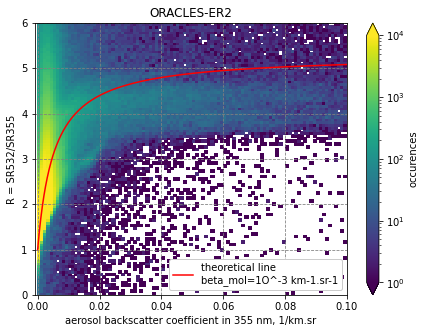

In [20]:
fg, ax = plt.subplots(figsize=(7,5))
counts, xbins, ybins = np.histogram2d(aer_355_all, sr532_all/sr355_all, 
                                     range = [[1e-6, 1e-1], [0,6]], bins = 100)

pax = ax.pcolormesh(xbins, ybins, counts.T, norm=LogNorm(vmax=1e4))
plt.colorbar(pax, ax=ax, label='occurences', extend='both')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')
# plt.xscale('log')
plt.xlabel('aerosol backscatter coefficient in 355 nm, 1/km.sr')
plt.ylabel('R = SR532/SR355')
plt.title(f'ORACLES-ER2')


# Théorie in 532nm
#--------------------------------------------
betamol532 = np.arange(#1e-3
beta_part = np.arange(0, 1e-1, 1e-4)
ratio_sr532_sr355 = 5.3 * (betamol532 + beta_part) / (betamol532*5.3 + beta_part)
plt.plot(beta_part, ratio_sr532_sr355, color='r', label = 'theoretical line \nbeta_mol=1O^-3 km-1.sr-1')
plt.legend(frameon=True, loc='lower right', facecolor='white', framealpha=1)
plt.xlim(-0.001, 0.1)

(-0.001, 0.1)

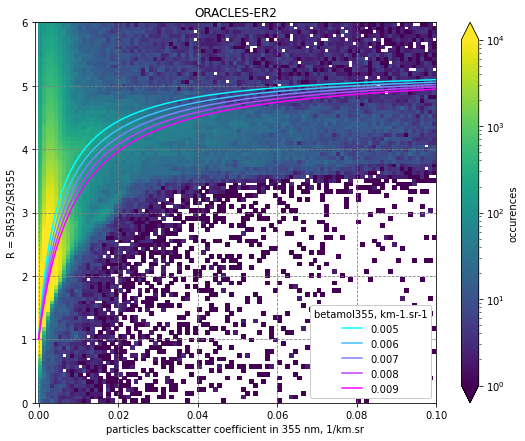

In [55]:
#-----------355nm------------
fg, ax = plt.subplots(figsize=(9,7))
# counts, xbins, ybins = np.histogram2d(aer_355_all, sr532_all/sr355_all, 
#                                      range = [[1e-6, 1e-1], [0,6]], bins = 100)
Hprobas, xbins, ybins = set_proba_histogram2d(xdata=aer_355_all, ydata=sr532_all/sr355_all, 
                                                range_data=[[1e-6, 1e-1], [0,6]], bin_data=100)
pax = ax.pcolormesh(xbins, ybins, Hprobas.T, norm=LogNorm(vmax=1e0, vmin=1e-5))
plt.colorbar(pax, ax=ax, label='%', extend='both')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')
# plt.xscale('log')
plt.xlabel('particles backscatter coefficient in 355 nm, 1/km.sr')
plt.ylabel('R = SR532/SR355')
plt.title(f'ORACLES-ER2')

betamol355s = np.arange(5e-3, 1e-2, 1e-3)
for betamol355 in betamol355s:
    beta_part = np.arange(0, 1e-1, 1e-4)
    ratio_sr532_sr355 = 5.3 * (betamol355/5.3 + beta_part) / (betamol355 + beta_part)
    ax.plot(beta_part, ratio_sr532_sr355, label=f'{np.round(betamol355,4)}')
    

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(title = 'betamol355, km-1.sr-1', frameon=True, loc='lower right', facecolor='white', framealpha=1)
# plt.xlabel('beta_part, km-1.sr-1')
# plt.ylabel('sr532/sr355')
# plt.title(f'with generated beta_part = np.arange(0, 1e-1, 1e-3)', loc='right')
# plt.ylim(0, 5.5)
plt.xlim(-0.001, 0.1)

0.001
0.002
0.003
0.004


(-0.001, 0.1)

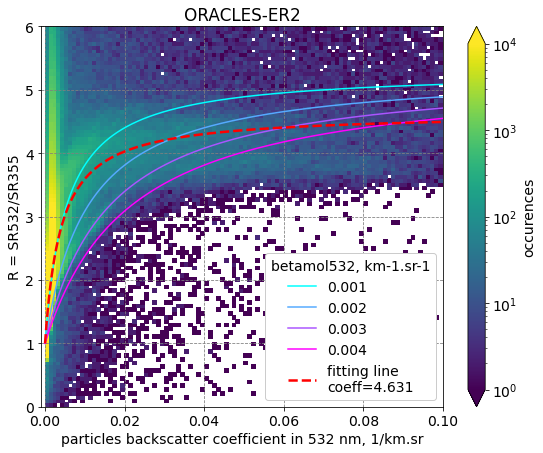

In [202]:
#-----------532nm------------

fg, ax = plt.subplots(figsize=(9,7))
plt.rcParams['font.size']=14

counts, xbins, ybins = np.histogram2d(aer_532_all, ratio_all, 
                                     range = [[1e-6, 1e-1], [0,6]], bins = 100)

pax = ax.pcolormesh(xbins, ybins, counts.T, norm=LogNorm(vmax=1e4))
plt.colorbar(pax, ax=ax, label='occurences', extend='both')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')
# plt.xscale('log')
plt.xlabel('particles backscatter coefficient in 532 nm, 1/km.sr')
plt.ylabel('R = SR532/SR355')
plt.title(f'ORACLES-ER2')

betamol532s = np.arange(1e-3, 5e-3, 1e-3)
for betamol532 in betamol532s:
    print(betamol532)
    beta_part = np.arange(0, 1e-1, 1e-4)
    ratio_sr532_sr355 = 5.3 * (betamol532 + beta_part) / (betamol532*5.3 + beta_part)
    ax.plot(beta_part, ratio_sr532_sr355, label=f'{np.round(betamol532,4)}')
    

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])


# Estimation in 355nm
#--------------------------------------------
y_estimated = param[0]*(betamol532/param[0] + beta_part)/(betamol532 + beta_part)
ax.plot(beta_part, y_estimated, '--', c='r', linewidth=2.5, label=f'fitting line \ncoeff={np.round(param[0],3)}')
ax.legend(title = 'betamol532, km-1.sr-1', frameon=True, loc='lower right', facecolor='white', framealpha=1)

plt.xlim(-0.001, 0.1)

In [101]:
pd.DataFrame(counts, index = xbins[1:], columns = ybins[1:]).squeeze()

,0.06,0.12,0.18,0.24,0.30,0.36,0.42,0.48,0.54,0.60,...,5.46,5.52,5.58,5.64,5.70,5.76,5.82,5.88,5.94,6.00
0.001001,23.0,24.0,28.0,26.0,41.0,35.0,59.0,131.0,180.0,286.0,...,124.0,98.0,110.0,102.0,86.0,105.0,88.0,102.0,104.0,100.0
0.002001,9.0,22.0,19.0,20.0,15.0,17.0,24.0,34.0,25.0,19.0,...,261.0,219.0,213.0,188.0,181.0,181.0,186.0,142.0,143.0,133.0
0.003001,8.0,10.0,8.0,17.0,14.0,18.0,12.0,14.0,10.0,9.0,...,347.0,292.0,252.0,232.0,236.0,226.0,205.0,183.0,198.0,175.0
0.004001,16.0,6.0,7.0,8.0,3.0,6.0,7.0,7.0,12.0,9.0,...,314.0,321.0,295.0,253.0,246.0,219.0,191.0,203.0,184.0,149.0
0.005001,7.0,9.0,9.0,9.0,7.0,3.0,4.0,4.0,7.0,6.0,...,249.0,225.0,211.0,198.0,180.0,185.0,161.0,145.0,160.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.096000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,2.0,2.0,5.0,1.0,3.0,3.0,0.0
0.097000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,3.0,1.0,0.0,1.0,2.0,4.0,3.0,1.0
0.098000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,3.0,2.0,4.0,4.0,1.0
0.099000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0


In [113]:
aer_532_all[idx], (sr532_all/sr355_all).shape

(array([3.09480805e-04, 2.82541723e-04, 2.84506409e-04, ...,
        1.62628684e-05, 1.63139022e-05, 1.64057437e-05]),
 (19856164,))

In [177]:
# Mesures en 532nm / Estimation du coeff.
#-------------------------------------------
maindir = Path('/homedata/nmpnguyen/ORACLES-ER2/')
listfiles = sorted(maindir.glob('HSRL2_ER2*_R8.h5'))

param_all = []
# fig, axs = plt.subplots(nrows = 4, ncols = 2, sharey=True, sharex=True, figsize = (15,15), constrained_layout=True)
for pathfile in listfiles:
    print(pathfile)
    DataProducts = xr.open_dataset(pathfile, group = 'DataProducts')
    bsc_aer_532 = DataProducts['532_bsc'].values
    bsc_aer_355 = DataProducts['355_bsc'].values
    pathfile = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', pathfile.name)
    file = xr.open_dataset(pathfile)
    sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
    sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values
    
    idx = np.where((sr_532/sr_355 > 0)&(sr_532/sr_355 < 6)&(bsc_aer_532 > 1e-6)&(bsc_aer_532 < 1e-1))
    bsc_aer_532 = bsc_aer_532[idx]
    sr_ratio = (sr_532/sr_355)[idx]
    param, _ = curve_fit(equation_532, bsc_aer_532, sr_ratio)
    print(param)
    param_all.append(param)

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
[4.51878086e+00 6.78081401e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
[5.09302108e+00 9.64924245e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
[5.14809705e+00 1.05531523e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
[4.6564082e+00 7.9885696e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
[3.95087196e+00 7.25035190e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
[3.61708474e+00 6.03416578e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
[4.33506891e+00 3.38360276e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
[4.56715223e+00 6.32585017e-04]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5
[5.34586330e+00 7.24903273e-04]


In [174]:
names = [pathfile.name for pathfile in listfiles]
names

['HSRL2_ER2_20160819_R8.h5',
 'HSRL2_ER2_20160823_R8.h5',
 'HSRL2_ER2_20160826_R8.h5',
 'HSRL2_ER2_20160912_R8.h5',
 'HSRL2_ER2_20160916_R8.h5',
 'HSRL2_ER2_20160918_R8.h5',
 'HSRL2_ER2_20160920_R8.h5',
 'HSRL2_ER2_20160922_R8.h5',
 'HSRL2_ER2_20160924_R8.h5']

In [178]:
param_all = pd.DataFrame(np.vstack(param_all), columns = ['a', 'beta'], index = names)

In [180]:
param_all.to_csv(Path(maindir, 'coeff_estimated_by_fitting_SR532_SR355_Betapart532.csv'))

In [183]:
# Mesures en 355nm / Estimation du coeff.
#-------------------------------------------
param_all = []
# fig, axs = plt.subplots(nrows = 4, ncols = 2, sharey=True, sharex=True, figsize = (15,15), constrained_layout=True)
for pathfile in listfiles:
    print(pathfile)
    DataProducts = xr.open_dataset(pathfile, group = 'DataProducts')
    bsc_aer_532 = DataProducts['532_bsc'].values
    bsc_aer_355 = DataProducts['355_bsc'].values
    pathfile = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', pathfile.name)
    file = xr.open_dataset(pathfile)
    sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
    sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values
    
    idx = np.where((sr_532/sr_355 > 0)&(sr_532/sr_355 < 6)&(bsc_aer_355 > 1e-6)&(bsc_aer_355 < 1e-1))
    bsc_aer_355 = bsc_aer_532[idx]
    sr_ratio = (sr_532/sr_355)[idx]
    param, _ = curve_fit(equation_355, bsc_aer_532, sr_ratio)
    print(param)
    param_all.append(param)

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
[4.62437561e+00 3.23405725e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
[5.08999732e+00 4.89651030e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
[5.15998276 0.00545745]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
[4.72696796e+00 3.85757175e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
[4.00171258e+00 2.95888878e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
[3.61432944e+00 2.17903338e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
[13.65428631  0.92622362]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
[4.60284551e+00 2.95082175e-03]
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5
[5.38313887e+00 3.93716366e-03]


In [184]:
param_all = pd.DataFrame(np.vstack(param_all), columns = ['a', 'beta'], index = names)
param_all.to_csv(Path(maindir, 'coeff_estimated_by_fitting_SR532_SR355_Betapart355.csv'))

In [187]:
param_all = []
aer_355_all = []
aer_532_all = []
ratio_all = []
# fig, axs = plt.subplots(nrows = 4, ncols = 2, sharey=True, sharex=True, figsize = (15,15), constrained_layout=True)
for pathfile in listfiles:
    print(pathfile)
    DataProducts = xr.open_dataset(pathfile, group = 'DataProducts')
    bsc_aer_532 = DataProducts['532_bsc'].values
    bsc_aer_355 = DataProducts['355_bsc'].values
    pathfile = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', pathfile.name)
    file = xr.open_dataset(pathfile)
    sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
    sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values
    idx = np.where((sr_532/sr_355 > 0)&(sr_532/sr_355 < 6)&(bsc_aer_532 > 1e-6)&(bsc_aer_532 < 1e-1))
    bsc_aer_532 = bsc_aer_532[idx]
    sr_ratio = (sr_532/sr_355)[idx]
    
    aer_532_all.append(bsc_aer_532)
    ratio_all.append(sr_ratio)

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


In [189]:
aer_532_all = np.concatenate(aer_532_all)
ratio_all = np.concatenate(ratio_all)

In [203]:
param, _ = curve_fit(equation_532, aer_532_all, ratio_all)

In [204]:
param

array([4.63101684e+00, 6.56831340e-04])

NameError: name 'sr532_all' is not defined

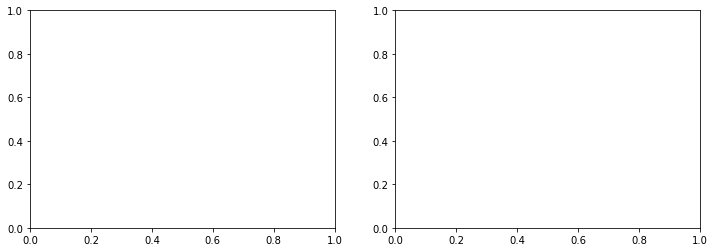

In [22]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12,4))
pc = ax.hist2d(sr532_all, sr355_all*param[0], range=[[0,80], [0,80]], bins=100, norm=LogNorm(vmax=1e4))
plt.colorbar(pc[3], ax=ax, label='Occurences')
ax.set(xlabel = 'SR532', ylabel = 'SR532 = SR355 * coeff', title = f'coeff = {np.round(param[0],3)}')
ax.plot(np.arange(0,80,1), np.arange(0,80,1), c='orange')
ax.plot(np.arange(0,80+1.5,1), np.arange(0,80+1.5,1), c='orange', linestyle='--')


pc = ax2.hist2d(sr532_all, sr355_all*5.3, range=[[0,80], [0,80]], bins=100, norm=LogNorm(vmax=1e4))
plt.colorbar(pc[3], ax=ax2, label='Occurences')
ax2.set(xlabel = 'SR532', ylabel = 'SR532 = SR355 * coeff', title = f'coeff = 5.3')
ax2.plot(np.arange(0,80,1), np.arange(0,80,1), c='orange')

In [ ]:
def probas_hist2d(x, y, z, ranges, bins):
    sums, xbins, ybins = np.histogram2d(x, y, weights=z, range=ranges, bins=bins)

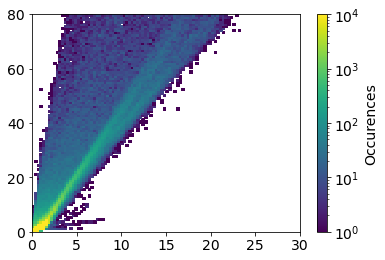

In [213]:
fig, ax = plt.subplots()
pc = ax.hist2d(sr355_all, sr532_all, range=[[0,30], [0,80]], bins=100, norm=LogNorm(vmax=1e4))
plt.colorbar(pc[3], ax=ax, label='Occurences')

In [223]:
import os 
os.chdir('/homedata/nmpnguyen/comparaison/Codes')
from fonctions import dataset, conditions, get_file, check, conversion, plots
os.getcwd()

In [12]:
print('----------------QUANTIFY--------------------')

unit_value = np.arange(0, 1.5, 0.1)
min_max_value = [0.0,80.0]
# pts_stats = []
# new_sr532_all = sr355_all * param[0]

# for u in unit_value:
#     pts = check(min_value_x=0.0, min_value_y=0.0, max_value_x=80.0, max_value_y=80.0, 
#                 closed_unit = u, x_data=sr532_all, y_data=new_sr532_all)
#     pts_stats.append(pts.quantify())
#     print(f'Quantify predicted data within +/- {u} unit around the diagonal and between {min_max_value}: {pts.quantify()} %')

----------------QUANTIFY--------------------


In [13]:
# coeff = 4.631
pts_stats1 = [0.0004263697242975212, 0.6003593937186904, 1.0643626674162554, 1.462294044801595, 1.894663767147062, 2.3898125786568665, 2.936721647299464, 3.5000742037429817, 4.063442171140389, 4.6322604792303235, 5.214660974682217, 5.82821728191561, 6.472328373728782, 7.13488124036398, 7.794018012220167]
# coeff = 5.3 
pts_stats2 = [0.00019006843131335281, 0.4130700710902166, 0.739001471900206, 1.0144825466580756, 1.297545810729959, 1.618180980386325, 1.9913418178853675, 2.413365653185832, 2.862625780995037, 3.31798864654479, 3.776490209703528, 4.238341086841085, 4.71082552216293, 5.206760292321138, 5.727439917442493]


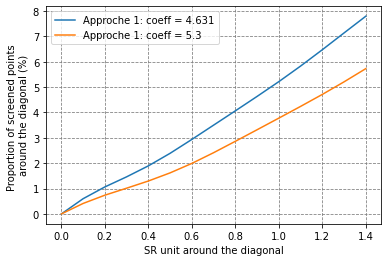

In [21]:
plt.plot(unit_value, pts_stats1, label='Approche 1: coeff = 4.631')
plt.plot(unit_value, pts_stats2, label='Approche 1: coeff = 5.3')
plt.legend()
plt.xlabel('SR unit around the diagonal')
plt.ylabel('Proportion of screened points \naround the diagonal (%)')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')